### Tweets analysis during kumbh mela festival using machine learning algorithm

Name: Wafa Faisal

Email: Wafaa.faisal.s@hotmail.com

Country: Saudi Arabia

Data Glacier internship  batch: LISUM01

Specialization: Natural Language Processing (NLP)

Date: 15-August-2021



## Importing Libraries:

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Surface
[nltk_data]     Go\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Surface
[nltk_data]     Go\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Data Structures
import numpy  as np
import pandas as pd
#import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
#import folium
#import branca.colormap as cm
#from branca.element import Figure

In [6]:
Tweet=pd.read_csv(r"C:\Users\Surface Go\Dropbox\wafa\T\project\tweets.csv")

## Corpus Processing

In [7]:
Tweet['Text']=Tweet['Text'].astype(str)
Tweet['language']=Tweet['language'].astype(str)

In [8]:
Tweet = Tweet.drop(Tweet[Tweet.language !='en'].index)

In [9]:
Tweet.count()

Text        2360
language    2360
dtype: int64

In [10]:
nan_value = float("NaN")
Tweet=Tweet.replace("", nan_value)
Tweet=Tweet.dropna(subset = ["Text"])
Tweet =Tweet.drop_duplicates(subset=['Text'])

In [15]:
def tweet_to_words(raw_tweet):
 raw_tweet.lower()
 raw_tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',raw_tweet)
 raw_tweet = re.sub('@[^\s]+',' ', raw_tweet)
 raw_tweet = re.sub('[\s]+', ' ', raw_tweet)
 raw_tweet = re.sub("[^a-zA-Z]", " ",raw_tweet)
 words = raw_tweet.lower().split()
 stops = set(stopwords.words("english"))
 meaningful_words = [w for w in words if not w in stops]
 return( " ".join( meaningful_words ))
 #--------------------------------------------------------------------------------

Tweet['clean_tweet']=Tweet['Text']
Tweet['clean_tweet']=Tweet['clean_tweet'].apply(lambda x: tweet_to_words(x))

In [16]:
corpus = Tweet['clean_tweet'].tolist()

### Statistical Weighting of Words

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1978 rows


,0,1,2,3,4,5,6,7,8,9,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977
superspreader,0.542304,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hundreds,0.488645,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
festival,0.408758,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test,0.305907,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coronavirus,0.262684,0.18576,0.163321,0.188175,0.107106,0.081709,0.108689,0.116829,0.137289,0.127143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977
superspreader,0.542304,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hundreds,0.488645,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
festival,0.408758,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test,0.305907,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coronavirus,0.262684,0.18576,0.163321,0.188175,0.107106,0.081709,0.108689,0.116829,0.137289,0.127143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-Means

In [19]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

#### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.

In [20]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [21]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

C:\Users\Surface Go\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Surface Go\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Surface Go\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Surface Go\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Surface Go\anaconda3\lib\site-packages\sklearn\cluster\

## Cluster Analysis



In [22]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

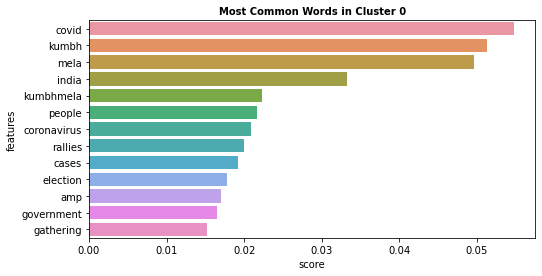

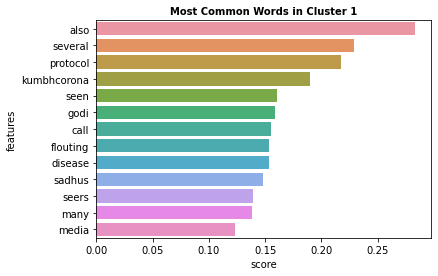

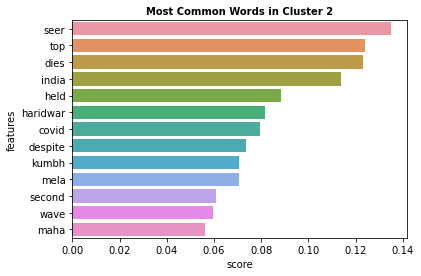

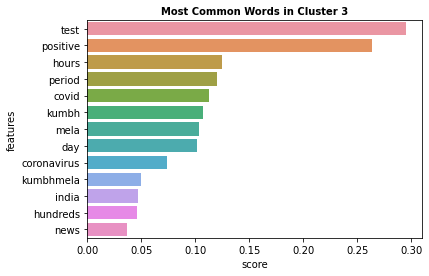

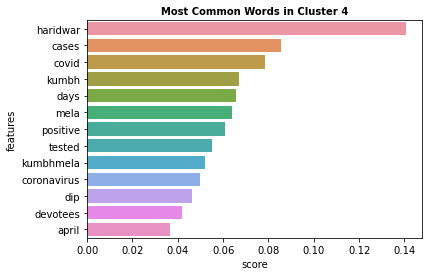

In [23]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

#### Map of Words

Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [24]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

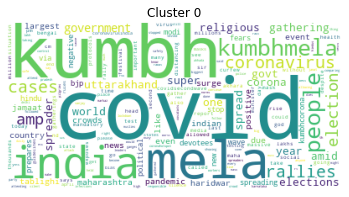

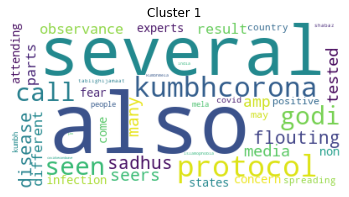

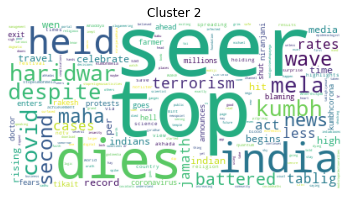

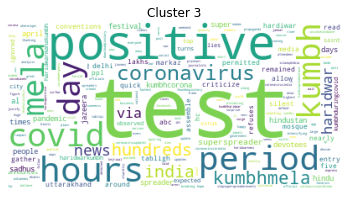

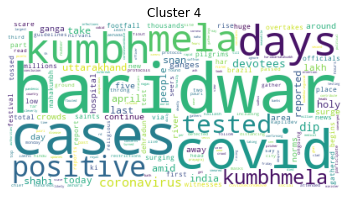

In [25]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)